In [15]:
import pandas as pd
file = open('swiftgplane.txt', 'r')
df = pd.DataFrame()
targetid = []
obsid = []
ra = []
dec = []
date = []
exposure = []
name = []
b = []
i = 0
for line in file.readlines():
    arr = line.split('|')
    targetid.append(arr[1].strip())
    obsid.append(arr[2].strip())
    ra.append(float(arr[3].strip().split()[0])*15. + float(arr[3].strip().split()[1])*15./60. + float(arr[3].strip().split()[2])*15./360.)
    dec.append(float(arr[4].strip().split()[0]) + float(arr[4].strip().split()[1])/60. + float(arr[4].strip().split()[2])/360.)
    date.append(arr[5].strip())
    exposure.append(float(arr[6].strip()))
    name.append(arr[9].strip())
    b.append(float(arr[10].strip()))
df['targetid'] = targetid
df['obsid'] = obsid
df['ra'] = ra
df['dec'] = dec
df['date'] = date
df['exposure'] = exposure
df['name'] = name
df['b'] = b
df.head()

targetid        obsid          ra        dec                   date  \
0   701590  00701590000  295.724583  21.953611  2016-06-26 13:56:39.8   
1   992099  00992099001   22.755417  63.108611  2020-08-19 16:47:05.2   
2   701590  00701590000  295.724583  21.953611  2016-06-26 18:44:28.7   
3   701590  00701590000  295.724583  21.953611  2016-06-26 15:33:07.7   
4   778435  00778435001   84.960000  34.495556  2017-10-13 04:38:56.4   

     exposure                    name        b  
0  2587.17894        Automatic Target  0.83069  
1  2552.21924  Burst (21.424, 63.061)  0.41062  
2  2542.23069        Automatic Target  0.83069  
3  2542.22831        Automatic Target  0.83069  
4  2519.75025  Burst (84.096, 34.455)  1.25591

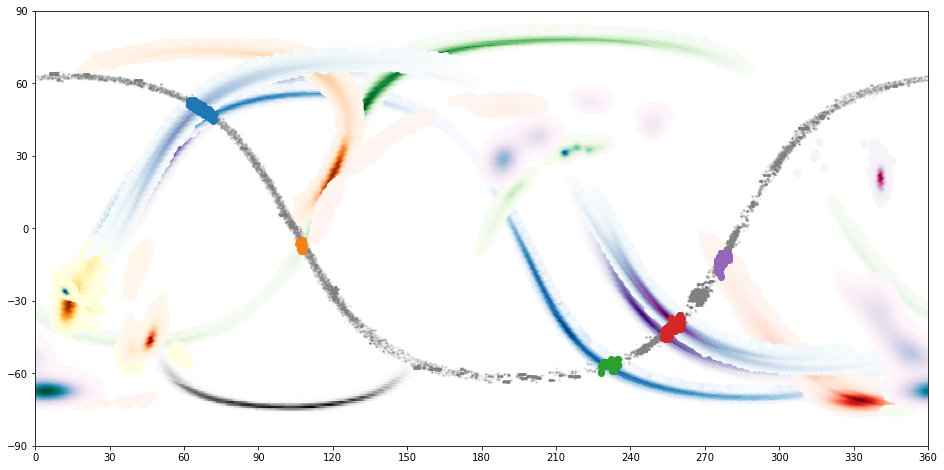

In [46]:
import matplotlib.pyplot as plt
import os
plt.figure(figsize=(16, 8))
plt.xlim(0, 360)
plt.ylim(-90, 90)
plt.yticks(range(-90, 91, 30))
plt.xticks(range(0, 361, 30))

cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'OrRd', 'PuRd', 'BuPu', 'GnBu', 'PuBuGn', 'YlGnBu']
i = 0
for dir in os.listdir('.'):
    if 'gw' in dir:
        probmap = pd.read_csv(dir + '/probmap.csv')
        probmaplikely = probmap[(probmap.b < 2) & (probmap.b > -2) & (probmap.prob > 0.001)]
        probmaplikely = probmap[probmap.prob > 10**-4]
        plt.scatter(probmaplikely.ra, probmaplikely.dec, c=probmaplikely.prob, cmap=cmaps[i])
        i += 1


r1 = df[(df.ra>62) & (df.ra<72) & (df.dec>39) & (df.dec<53)]     #done
r2 = df[(df.ra>106) & (df.ra<108) & (df.dec>-10) & (df.dec<-5)]  #done
r3 = df[(df.ra>228) & (df.ra<235) & (df.dec>-70) & (df.dec<-52)] #done
r4 = df[(df.ra>253) & (df.ra<261) & (df.dec>-46) & (df.dec<-35)] #done
r5 = df[(df.ra>275) & (df.ra<283) & (df.dec>-20) & (df.dec<-10)]

plt.scatter(df.ra, df.dec, color='gray', s=2, alpha=0.1)
plt.scatter(r1.ra, r1.dec)
plt.scatter(r2.ra, r2.dec)
plt.scatter(r3.ra, r3.dec)
plt.scatter(r4.ra, r4.dec)
plt.scatter(r5.ra, r5.dec)

In [49]:
swiftobs = r1.append(r2, ignore_index=True).append(r3, ignore_index=True).append(r4, ignore_index=True).append(r5, ignore_index=True)
swiftobs

targetid        obsid          ra        dec                   date  \
0       10734  00010734010   71.802917  47.422778    2018-08-31 07:42:48   
1       10734  00010734016   71.873333  47.526944  2018-10-26 13:37:01.3   
2       10734  00010734001   71.541667  47.460000  2018-07-20 03:28:42.1   
3       10734  00010734045   71.907500  47.408889  2020-08-23 21:31:16.1   
4       10734  00010734036   71.979583  47.472222  2019-09-16 16:39:50.2   
...       ...          ...         ...        ...                    ...   
1725   960986  00960986001  276.463333 -15.778333  2020-03-13 05:12:09.4   
1726  3110764  03110764001  278.326250 -12.562778  2020-03-26 16:46:50.5   
1727  3110764  03110764003  278.490417 -12.681111  2020-05-30 20:10:28.8   
1728  3110764  03110764001  278.326250 -12.562778  2020-03-26 10:36:45.2   
1729  3110729  03110729001  277.056250 -13.022500  2020-02-15 01:47:42.2   

        exposure               name        b  
0     1618.23663            V392Per  0.89092  
1     1605.75352            V392Per  0.93088  
2     1565.79351            V392Per  0.94890  
3     1530.83234            V392Per  0.90520  
4     1495.86867            V392Per  0.92289  
...          ...                ...      ...  
1725    52.44285  SwiftJ1818.0-1607 -0.09680  
1726    49.94555   SGPSJ1824.9-1318 -0.28283  
1727    24.97280   SGPSJ1824.9-1318 -0.30542  
1728     7.49187   SGPSJ1824.9-1318 -0.28283  
1729     7.49182   SGPSJ1819.9-1459  0.00516  

[1730 rows x 8 columns]

In [56]:
swiftobs.to_csv('swift_gplane_probregion.csv')

In [55]:
from shutil import copyfile
for dir in os.listdir('galacticplane/swift'):
    if '0' in dir:
        print(os.listdir('galacticplane/swift/' + dir + '/xrt/event/'))

['sw00010073001xpcw3po_cl.evt.gz', 'sw00010073001xpcw3po_uf.evt.gz', 'sw00010073001xwtw2sl_cl.evt.gz', 'sw00010073001xwtw2sl_uf.evt.gz', 'sw00010073001xwtw2sl_ufre.evt.gz', 'sw00010073001xwtw2st_cl.evt.gz', 'sw00010073001xwtw2st_uf.evt.gz', 'sw00010073001xwtw2st_ufre.evt.gz']
['sw00010073002xpcw3po_cl.evt.gz', 'sw00010073002xpcw3po_uf.evt.gz', 'sw00010073002xwtw2sl_cl.evt.gz', 'sw00010073002xwtw2sl_uf.evt.gz', 'sw00010073002xwtw2sl_ufre.evt.gz', 'sw00010073002xwtw2st_cl.evt.gz', 'sw00010073002xwtw2st_uf.evt.gz', 'sw00010073002xwtw2st_ufre.evt.gz']
['sw00010186001xpcw3po_cl.evt.gz', 'sw00010186001xpcw3po_uf.evt.gz', 'sw00010186001xwtw2sl_cl.evt.gz', 'sw00010186001xwtw2sl_uf.evt.gz', 'sw00010186001xwtw2sl_ufre.evt.gz', 'sw00010186001xwtw2st_cl.evt.gz', 'sw00010186001xwtw2st_uf.evt.gz', 'sw00010186001xwtw2st_ufre.evt.gz']
['sw00010186002xpcw3po_cl.evt.gz', 'sw00010186002xpcw3po_uf.evt.gz', 'sw00010186002xwtw2st_cl.evt.gz', 'sw00010186002xwtw2st_uf.evt.gz', 'sw00010186002xwtw2st_ufre.evt.g

['sw03102685001xpcw3po_cl.evt.gz', 'sw03102685001xpcw3po_uf.evt.gz', 'sw03102685001xwtw2sl_cl.evt.gz', 'sw03102685001xwtw2sl_uf.evt.gz', 'sw03102685001xwtw2sl_ufre.evt.gz', 'sw03102685001xwtw2st_cl.evt.gz', 'sw03102685001xwtw2st_uf.evt.gz', 'sw03102685001xwtw2st_ufre.evt.gz']
['sw03102685002xpcw3po_cl.evt.gz', 'sw03102685002xpcw3po_uf.evt.gz', 'sw03102685002xwtw2sl_cl.evt.gz', 'sw03102685002xwtw2sl_uf.evt.gz', 'sw03102685002xwtw2sl_ufre.evt.gz', 'sw03102685002xwtw2st_uf.evt.gz', 'sw03102685002xwtw2st_ufre.evt.gz']
['sw03102689001xpcw3po_cl.evt.gz', 'sw03102689001xpcw3po_uf.evt.gz', 'sw03102689001xwtw2sl_cl.evt.gz', 'sw03102689001xwtw2sl_uf.evt.gz', 'sw03102689001xwtw2sl_ufre.evt.gz', 'sw03102689001xwtw2st_cl.evt.gz', 'sw03102689001xwtw2st_uf.evt.gz', 'sw03102689001xwtw2st_ufre.evt.gz']
['sw03102693001xpcw3po_cl.evt.gz', 'sw03102693001xpcw3po_uf.evt.gz', 'sw03102693001xwtw2sl_cl.evt.gz', 'sw03102693001xwtw2sl_uf.evt.gz', 'sw03102693001xwtw2sl_ufre.evt.gz', 'sw03102693001xwtw2st_cl.evt.g